In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

In [2]:
#Importing dataset
data = pd.read_csv("/content/Mall_Customers.csv")

In [3]:
#Getting the shape
data.shape

(200, 5)

In [4]:
#Previewing the dataset
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
#random sample
data.sample(15)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
17,18,Male,20,21,66
70,71,Male,70,49,55
174,175,Female,52,88,13
166,167,Male,42,86,20
66,67,Female,43,48,50
147,148,Female,32,77,74
8,9,Male,64,19,3
128,129,Male,59,71,11
15,16,Male,22,20,79
12,13,Female,58,20,15


In [6]:
#Describing the dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
#Getting info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [8]:
#looking for null values
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

The aim of this project is to identify the target customers segment by using market basket analysis techniques.

From the dataset information, there are a total of 5 columns; customerID, Gender, Age, annual income and spending score

From the available information, I can see that there are a total of 200 entries and 5 features; 4 numerical and 1 object. From the description, I can also infer that there are no missing values.

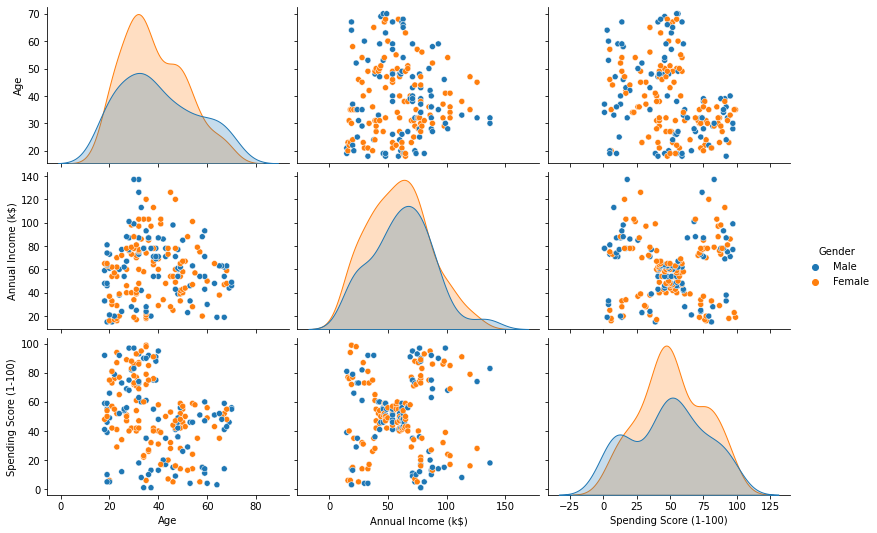

In [9]:
#Visualizing the data
sns.pairplot(data.drop('CustomerID', axis=1), hue='Gender', aspect=1.5)
plt.show()

From the graphs, Gender does not have a direct relation to segmenting customers. I will drop Gender column and focus on other features. Since customer ID has too many unique values, I will also drop it to avoid confusing the model

In [10]:
#Dropping gender
X = data.drop(['CustomerID', 'Gender'], axis=1, inplace=True)

In [11]:
#Using Kmeans to find out the clusters
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init="k-means++", random_state=0)
  kmeans.fit(data)
  wcss.append(kmeans.inertia_)

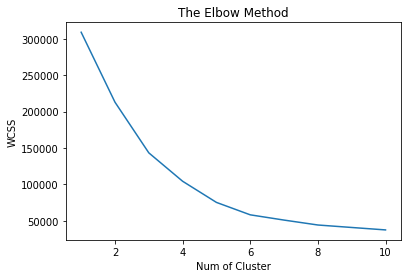

In [12]:
#Plot the graph
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Num of Cluster")
plt.ylabel("WCSS")
plt.show()

From the Elbow Method, the bend at X=3 and X=5 means that there may be either 3 or 5 number of clusters.

In [13]:
#fitting KMeans to 5 clusters model
kmeans = KMeans(n_clusters=5)
kmeans_fmodel = kmeans.fit(data)
y_kmean = kmeans_fmodel.predict(data)
data['Clusters'] = y_kmean

In [14]:
data.head()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,19,15,39,3
1,21,15,81,4
2,20,16,6,3
3,23,16,77,4
4,31,17,40,3


In [15]:
data.tail()

,Age,Annual Income (k$),Spending Score (1-100),Clusters
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1
199,30,137,83,0


As shown in data.head and tail, there are a total of 5 clusters. With customer assigned to different clusters

In [16]:
#Looking at the kmeans centroids array
kmeans_fmodel.cluster_centers_

array([[32.69230769, 86.53846154, 82.12820513],
       [40.66666667, 87.75      , 17.58333333],
       [43.08860759, 55.29113924, 49.56962025],
       [45.2173913 , 26.30434783, 20.91304348],
       [25.52173913, 26.30434783, 78.56521739]])

In [17]:
#Looking at the array of cluster separation
y_kmean

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 2, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0], dtype=int32)

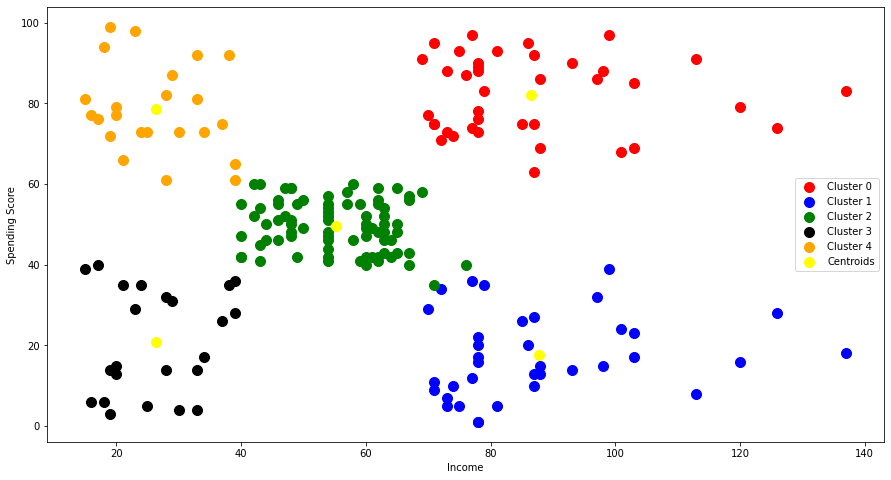

In [18]:
#Scatterplot to visualize the cluster
X = data.iloc[:,[1,2]].values
plt.figure(figsize=(15,8))
#Plotting the scatterplot
plt.scatter(X[y_kmean==0,0], X[y_kmean==0,1], s=100, c='red', label="Cluster 0")
plt.scatter(X[y_kmean==1,0], X[y_kmean==1,1], s=100, c='blue', label="Cluster 1")
plt.scatter(X[y_kmean==2,0], X[y_kmean==2,1], s=100, c='green', label="Cluster 2")
plt.scatter(X[y_kmean==3,0], X[y_kmean==3,1], s=100, c='black', label="Cluster 3")
plt.scatter(X[y_kmean==4,0], X[y_kmean==4,1], s=100, c='orange', label="Cluster 4")
#Plotting the centroids
plt.scatter(kmeans_fmodel.cluster_centers_[:,1], kmeans_fmodel.cluster_centers_[:,2], s=100, c="yellow", label='Centroids')
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

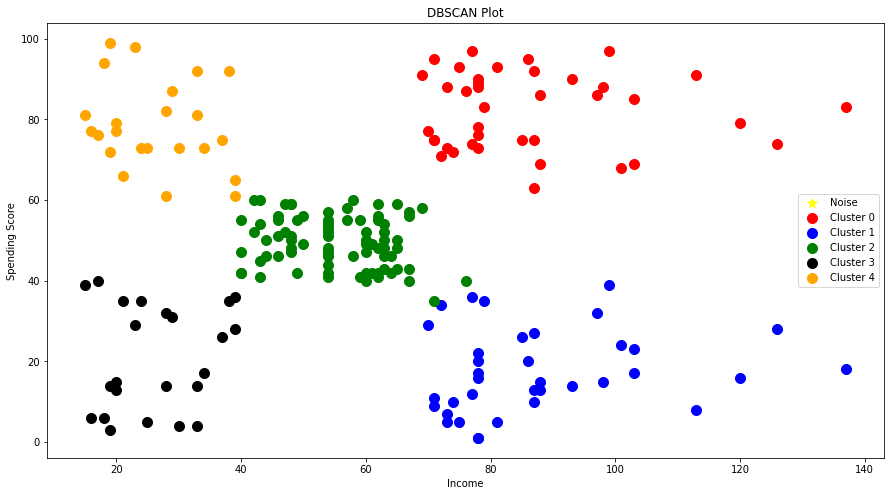

In [21]:
#Using Density Based Clustering DBSCAN
db = DBSCAN(eps= 12, min_samples=8, metric='euclidean')
X = data.iloc[:,[1,2]].values
plt.figure(figsize=(15,8))
plt.scatter(X[y_kmean ==-1,0], X[y_kmean ==-1,1], s=100, c='yellow', marker="*", label='Noise')
plt.scatter(X[y_kmean==0,0], X[y_kmean==0,1], s=100, c='red', label="Cluster 0")
plt.scatter(X[y_kmean==1,0], X[y_kmean==1,1], s=100, c='blue', label="Cluster 1")
plt.scatter(X[y_kmean==2,0], X[y_kmean==2,1], s=100, c='green', label="Cluster 2")
plt.scatter(X[y_kmean==3,0], X[y_kmean==3,1], s=100, c='black', label="Cluster 3")
plt.scatter(X[y_kmean==4,0], X[y_kmean==4,1], s=100, c='orange', label="Cluster 4")
plt.title("DBSCAN Plot")
plt.xlabel("Income")
plt.ylabel("Spending Score")
plt.legend()
plt.show()

Customers are split into 5 groups.

Cluster 0 is High Income, high spending. 

Cluster 2 is High Income, Low Spending.

Cluster 1 is Low Income, low spending.

Cluster 3 is Mid Income, mid spending.

Cluster 4 is Low Income, High Spending. 

As shown by the cluster, majority of the mall's customers comes from High income,High spending as well as Mid Income, Mid spending. The mall is currently doing well with these 2 groups but can attract the group with high income, low spending by improving its customer services as well as marketing campaigns to attract this particular group